# Milestone Report Part 1

## Introduction

The aim of this section of the Milestone report is to begin to clean and explore the dataset for the language used in the Presidential Primary debates and, hopefully, gain further insight into one or more aspects of the data.

In [1]:
import pandas as pd
df = pd.read_csv('data/primary_debates_cleaned.csv', encoding = "ISO-8859-1")
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
%matplotlib notebook

###  Cleaning the Data

First it's necessary to clean the data to include only relevant speakers, and also to make the speakers' names consistent to allow for easier selection when looping. 

In [2]:
-

,Line,Speaker,Text,Date,Party,Location,URL
6,7,Clinton,Thank you.,2/11/16,Democratic,"Milwaukee, Wisconsin",http://www.presidency.ucsb.edu/ws/index.php?pi...
10,11,Sanders,"Well, Gwen and Judy, thank you very much for h...",2/11/16,Democratic,"Milwaukee, Wisconsin",http://www.presidency.ucsb.edu/ws/index.php?pi...
14,15,Clinton,I'm running for president to knock down all th...,2/11/16,Democratic,"Milwaukee, Wisconsin",http://www.presidency.ucsb.edu/ws/index.php?pi...
20,21,Sanders,"Well, to put that in a context, Judy, I think ...",2/11/16,Democratic,"Milwaukee, Wisconsin",http://www.presidency.ucsb.edu/ws/index.php?pi...
22,23,Sanders,"... Of course there will be a limit, but when ...",2/11/16,Democratic,"Milwaukee, Wisconsin",http://www.presidency.ucsb.edu/ws/index.php?pi...


Now take a deeper look at the data to see what can be done with it.

In [3]:
debates_list = []
debates_places = []
for place in df.Location.unique():
    debates_list.append(df[df.Location == place])
    debates_places.append(place)
debates_places

['Milwaukee, Wisconsin',
 'Miami, Florida',
 'Charleston, South Carolina',
 'Greenville, South Carolina',
 'Cleveland, Ohio',
 'Boulder, Colorado',
 'Las Vegas, Nevada',
 'Manchester, New Hampshire',
 'North Charleston, South Carolina',
 'Flint, Michigan',
 'Brooklyn, New York',
 'Des Moines, Iowa',
 'Durham, New Hampshire',
 'Detroit, Michigan',
 'Houston, Texas',
 'Simi Valley, California']

In [4]:
debates_speakers = []
for speaker in df.Speaker.unique():
    debates_speakers.append(speaker)
debates_speakers[:5]

['Clinton', 'Sanders', 'Kasich', 'Rubio', 'Cruz']

In [5]:
list(df)

['Line', 'Speaker', 'Text', 'Date', 'Party', 'Location', 'URL']

Top start the sentiment analysis each speaker's words will be broken into sentences, with the cumulative sentiment of each sentences will show clearly whether the sentiment trend is positive or negative. The Textblob library contains particularly useful methods for this analysis.

In [6]:
sentiment_list = []
cumulative_sentiment_list=[]
cumulative_sentiment = 0
for i, row in df.iterrows():
    text_blob = TextBlob(row['Text'])
    sentences = text_blob.sentences
    for sentence in sentences:
        sentiment_list.append(sentence.sentiment.polarity)
        cumulative_sentiment += sentence.sentiment.polarity
        cumulative_sentiment_list.append(cumulative_sentiment)
cumulative_sentiment_list[-1:]

[2403.235198348811]

We can see that the cumulative sentiment in the Primary debates is clearly positive, but how does this overall score relate to the trend and randomness of the speech exhibited? 

<IPython.core.display.Javascript object>


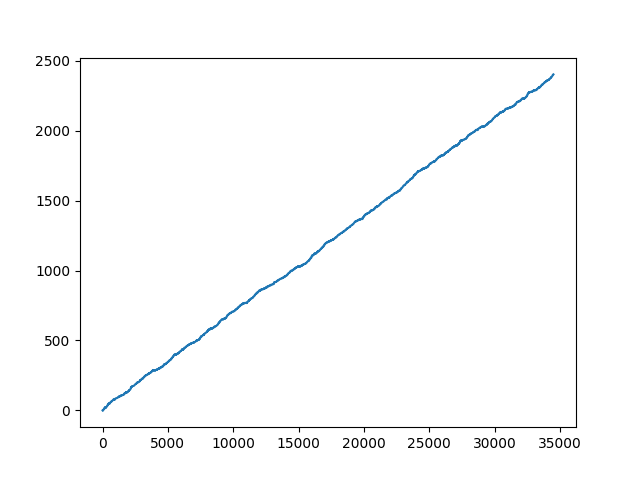

In [22]:
plt.plot(cumulative_sentiment_list)
plt.show()

In [8]:
from scipy.stats import linregress

linregress(np.arange(len(cumulative_sentiment_list)),cumulative_sentiment_list)

LinregressResult(slope=0.069422415149566319, intercept=5.6810836130016469, rvalue=0.99988011731808679, pvalue=0.0, stderr=5.7871642018441703e-06)

Not only is the sentiment positive but by inspection we can see that the trend follows an almost perfect straight line with an r value of 0.99987 and a standard deviation of of 6 in a million! This demonstrates the Girard hypothesis again that candidates are fighting over the same cognitive terroritory and very heavy preselection bias of candidates and their speech. There is very little randomness in this speech! Also, considering how controversial many of these debates turned out to be, it is at least as likely that the controversy arose as a result of candidate similarity as candidate differences.

<IPython.core.display.Javascript object>


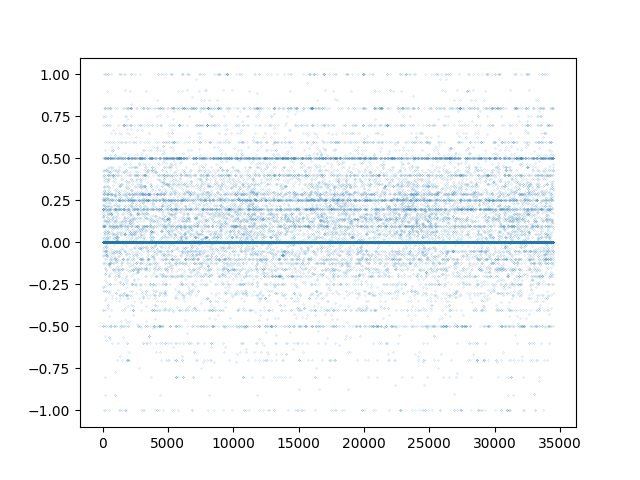

In [23]:
plt.scatter(np.arange(len(cumulative_sentiment_list)),sentiment_list, s=0.01)
plt.show()

We can see above that sentence sentiment clusters within certain 'harmonic ranges' at 0.5, -0.5, 1, -1 and a few more.

In [10]:
import statistics

print ("The standard deviation of the polarity per sentence of primary candidates is: " + str(statistics.stdev(sentiment_list)))

The standard deviation of the polarity per sentence of primary candidates is: 0.23666159803278597


Not only is the mean sentiment consistently positive but close to neutral, but the standard that deviation of the candidates' speech is such that incremental polarity either side of the mean captures 99.9% of the entire breadth of polarity. Not only is the trend of sentiment polarity very consistent, but the standard deviation of the polarity very closely fits 1/ 4 standard deviations either side of the mean of all possible polarities. Again this demonstrates very extreme selection bias.

In [11]:
def speaker_sent(Speaker):
    sentiment_list =[]
    cumulative_sentiment_list=[]
    cumulative_sentiment = 0
    for i, row in df.loc[df['Speaker'] == Speaker].iterrows():
        text_blob = TextBlob(row['Text'])
        sentences = text_blob.sentences
        for sentence in sentences:
            sentiment_list.append(sentence.sentiment.polarity)
            cumulative_sentiment += sentence.sentiment.polarity
            cumulative_sentiment_list.append(cumulative_sentiment)
    return [cumulative_sentiment_list, sentiment_list]



In [12]:
trump_sent= speaker_sent('Trump')
plt.plot(trump_sent[0])
plt.show()

In [13]:
linregress(np.arange(len(trump_sent[0])), trump_sent[0])

LinregressResult(slope=0.07398350558386492, intercept=-1.4708587771536088, rvalue=0.99827905585568744, pvalue=0.0, stderr=7.0006529216391853e-05)

In [14]:
trump_mean_sent = str(trump_sent[0][-1]/len(trump_sent[0]))

print("The mean sentiment polarity per sentence of Donald Trump is: " + trump_mean_sent)

The mean sentiment polarity per sentence of Donald Trump is: 0.07269568725594108


<IPython.core.display.Javascript object>


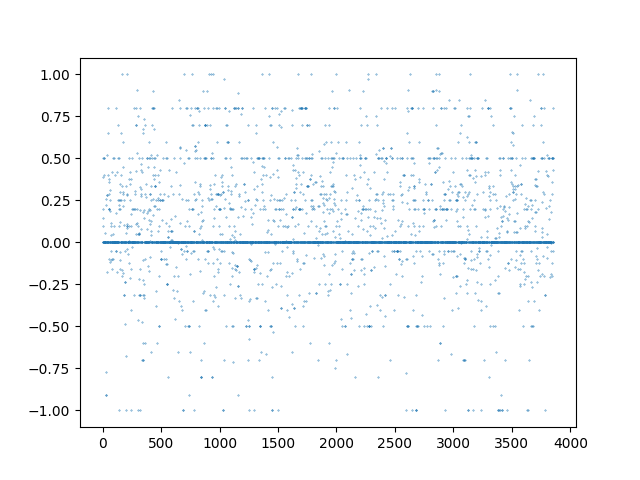

In [24]:
trump_sent= speaker_sent('Trump')
plt.scatter(np.arange(len(trump_sent[1])),trump_sent[1], s=0.1)
plt.show()

In [16]:
print ("The standard deviation of sentiment polarity per sentence of primary candidates is: " + str(statistics.stdev(trump_sent[1])))

The standard deviation of sentiment polarity per sentence of primary candidates is: 0.2883163887031681


In [17]:
sent_dict = {}
for speaker in debates_speakers:
    sent = speaker_sent(speaker)
    sent_dict[speaker] = sent
    mean_sent = str(sent[0][-1]/len(sent[0]))
    print ("The mean sentiment polarity per sentence of " + speaker + " is: " + mean_sent + "\n")
    print ("The standard deviation of sentiment polarity per sentence of " + speaker + " is:" \
     + str(statistics.stdev(sent[1])) + "\n \n")
                                          

The mean sentiment polarity per sentence of Clinton is: 0.10039811427954946

The standard deviation of sentiment polarity per sentence of Clinton is:0.23978478151184693
 

The mean sentiment polarity per sentence of Sanders is: 0.06385093945682355

The standard deviation of sentiment polarity per sentence of Sanders is:0.2403614929885484
 

The mean sentiment polarity per sentence of Kasich is: 0.06491973832598832

The standard deviation of sentiment polarity per sentence of Kasich is:0.2221467525973166
 

The mean sentiment polarity per sentence of Rubio is: 0.06740270384847581

The standard deviation of sentiment polarity per sentence of Rubio is:0.24060081033140485
 

The mean sentiment polarity per sentence of Cruz is: 0.06126730286645594

The standard deviation of sentiment polarity per sentence of Cruz is:0.234144344055493
 

The mean sentiment polarity per sentence of Trump is: 0.07269568725594108

The standard deviation of sentiment polarity per sentence of Trump is:0.288316388

In [18]:
mean_sent_list = []
for key, value in sent_dict.items():
    mean = value[0][-1]/len(value[0])
    std_dev = statistics.stdev(value[1])
    mean_sent_list.append([key, mean, std_dev])
    
speaker_list = []
means_list = []
std_dev_list = []
for item in mean_sent_list:
    speaker_list.append(item[0])
    means_list.append(item[1])
    std_dev_list.append(item[2])


In [19]:
np.random.randn(100,8).shape

(100, 8)

In [20]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

<IPython.core.display.Javascript object>


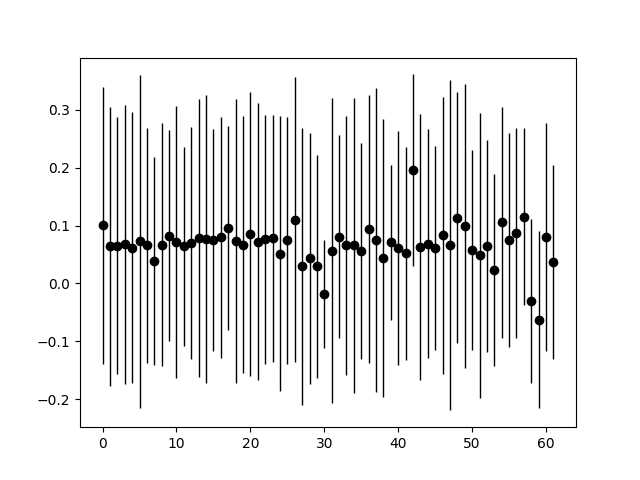

In [26]:
plt.errorbar(np.arange(len(speaker_list)), means_list, std_dev_list, fmt='ok', lw=1)
plt.show()

We can see from the above chart that the majority of speakers have a mean sentiment between 0 and 0.1 with a standard deviation of around 0.25, which creates very close 4 std deviation distribution of sentiment across the range of all sentiments. For the Capstone Report the will move to a few of the main contenders.

From the Republican Party:

1. Donald Trump 
2. Jeb Bush 
3. Ben Carson
4. Rand Paul

From the Democratic Party:

1. Hillary Clinton
2. Bernie Sanders